In [1]:
from sklearn import preprocessing
import pickle
import pkg_resources
from skimage import feature, color, filters, morphology, segmentation

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
dirpath = pkg_resources.resource_filename('core_photo_force', 'data')

turk_dir = []
objects = []

# with (open(dirpath + '/' + 'turk_file6506_round2_sed_structs.pkl', "rb")) as openfile:
#     while True:
#         try:
#             objects.append(pickle.load(openfile))
#         except EOFError:
#             break
with (open(dirpath + '/' + 'turk_file6506_peter.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
with (open(dirpath + '/' + 'turk_file6406_peter.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
with (open(dirpath + '/' + 'turk_file6507_peter.pkl', "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
print(objects[0])

defaultdict(<class 'list'>, {'img_Sample': [array([[[ 90, 110, 117],
        [ 92, 109, 117],
        [ 96, 109, 117],
        ..., 
        [ 70,  79,  96],
        [ 74,  81,  99],
        [ 66,  79,  95]],

       [[ 89, 108, 115],
        [ 91, 108, 115],
        [ 95, 108, 116],
        ..., 
        [ 71,  76,  95],
        [ 71,  78,  96],
        [ 65,  74,  91]],

       [[ 90, 109, 115],
        [ 88, 109, 114],
        [ 94, 107, 115],
        ..., 
        [ 66,  73,  91],
        [ 63,  75,  89],
        [ 64,  73,  88]],

       ..., 
       [[ 69,  83,  92],
        [ 66,  83,  91],
        [ 63,  77,  88],
        ..., 
        [ 71,  88, 104],
        [ 66,  84,  98],
        [ 65,  81,  96]],

       [[ 59,  73,  82],
        [ 62,  70,  81],
        [ 59,  62,  77],
        ..., 
        [ 69,  80,  98],
        [ 68,  74,  96],
        [ 68,  76,  97]],

       [[ 52,  66,  79],
        [ 51,  58,  76],
        [ 51,  49,  70],
        ..., 
        [ 68,  81,  98],

Sum Red
18566
Sum Green
17970
Sum Blue
19966
summed luminance
6908.22816
Sobel V sum
-11.4018870588
Sobel H sum
4.41818823529
max h edge count
67
max v edge count
64
Gabor kernal
9.84358757892


Dilated Vert Image
15244
Dilated Horz Image
14959
Segment Count
28


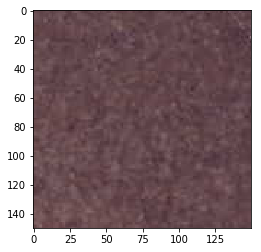

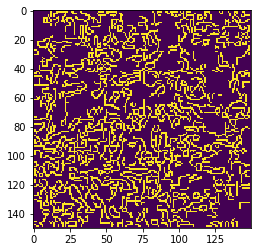

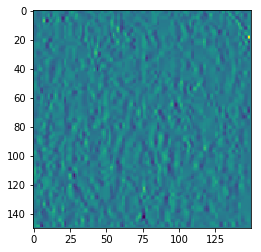

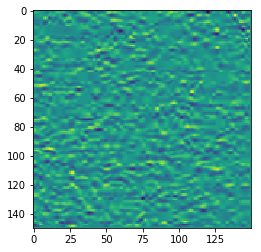

(150, 150)


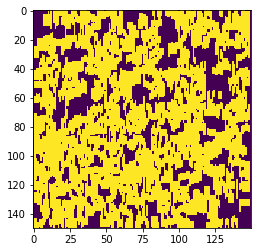

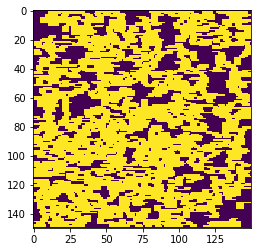

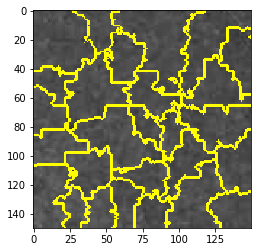

Sum Red
16743
Sum Green
18812
Sum Blue
17468
summed luminance
12367.6661141
Sobel V sum
-9.89267156863
Sobel H sum
-2.30609568627
max h edge count
84
max v edge count
71
Gabor kernal
18.407268452


Dilated Vert Image
16291
Dilated Horz Image
16677
Segment Count
35


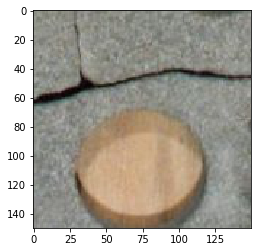

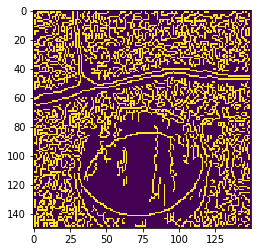

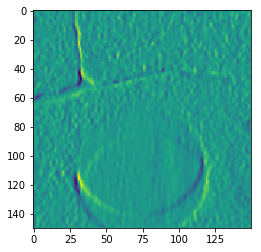

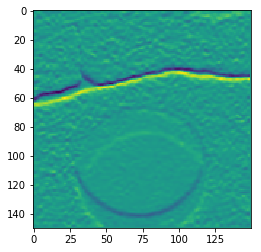

(150, 150)


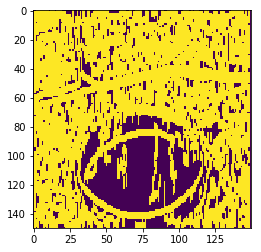

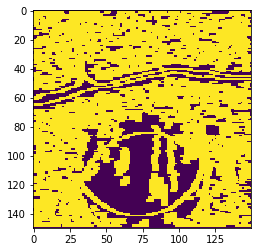

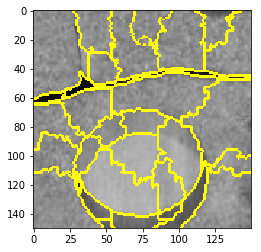

Sum Red
20312
Sum Green
17421
Sum Blue
18900
summed luminance
3990.65036157
Sobel V sum
-16.7128448039
Sobel H sum
1.71281343137
max h edge count
42
max v edge count
89
Gabor kernal
5.77055783519


Dilated Vert Image
7295
Dilated Horz Image
5112
Segment Count
21


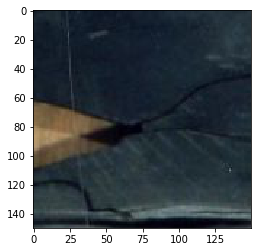

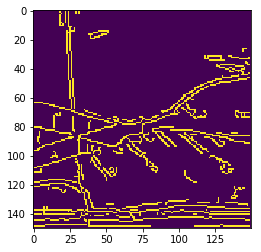

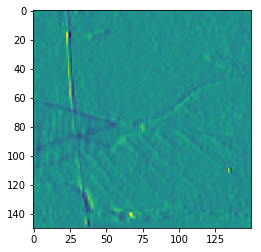

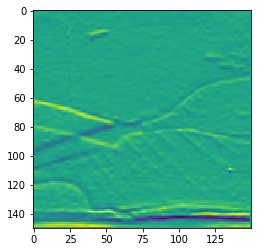

(150, 150)


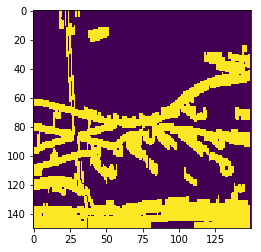

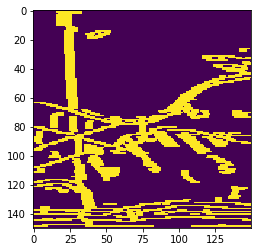

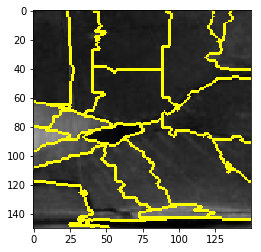

Sum Red
20434
Sum Green
19736
Sum Blue
19410
summed luminance
13265.9587812
Sobel V sum
-18.9127371569
Sobel H sum
3.35591892157
max h edge count
66
max v edge count
53
Gabor kernal
19.5813404766


Dilated Vert Image
12469
Dilated Horz Image
12545
Segment Count
26


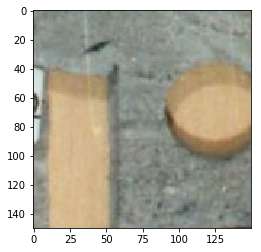

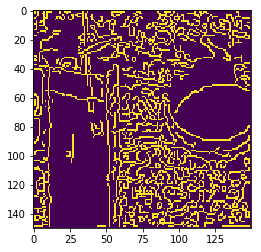

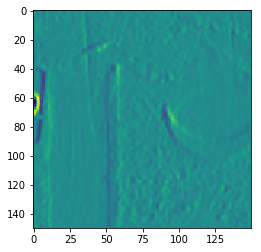

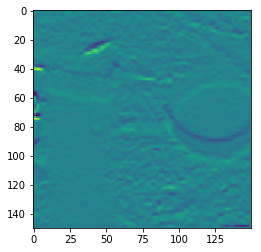

(150, 150)


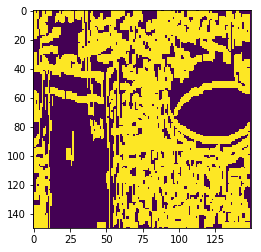

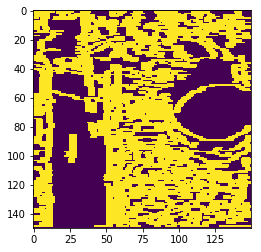

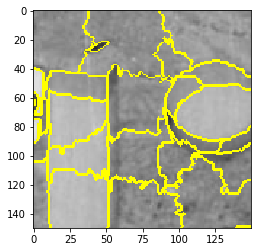

Sum Red
17146
Sum Green
19487
Sum Blue
18914
summed luminance
14406.9589843
Sobel V sum
-8.92125421569
Sobel H sum
-14.9047002941
max h edge count
55
max v edge count
63
Gabor kernal
20.7712848549


Dilated Vert Image
17222
Dilated Horz Image
13149
Segment Count
29


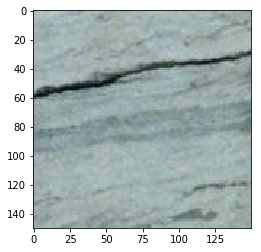

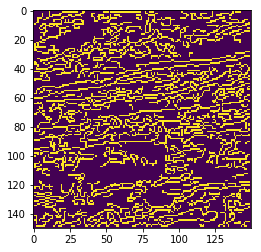

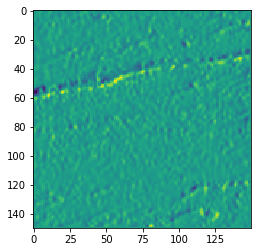

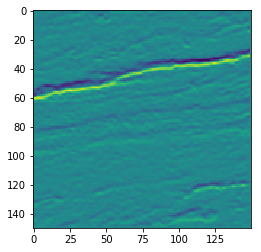

(150, 150)


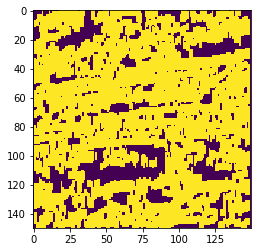

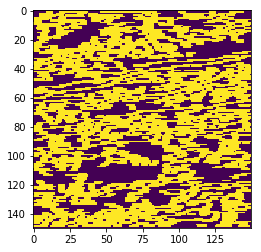

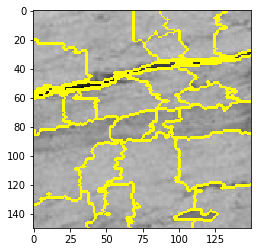

Sum Red
18800
Sum Green
18724
Sum Blue
17127
summed luminance
13797.4985094
Sobel V sum
6.50269215686
Sobel H sum
-3.25130980392
max h edge count
25
max v edge count
42
Gabor kernal
19.7688873735


Dilated Vert Image
7169
Dilated Horz Image
4206
Segment Count
26


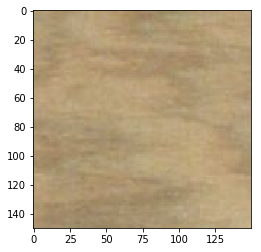

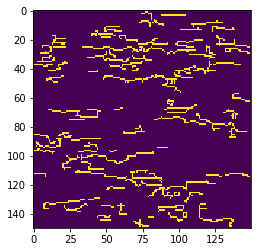

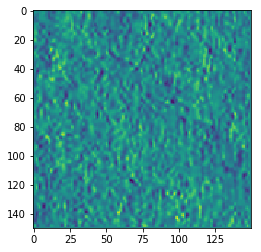

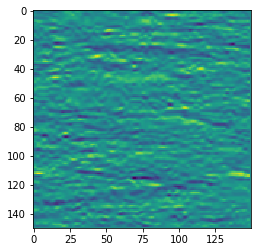

(150, 150)


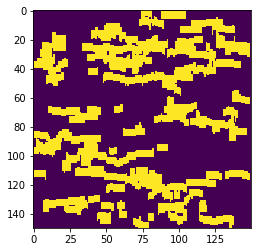

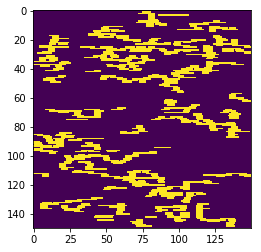

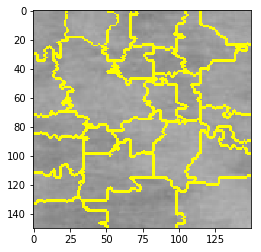

Sum Red
17889
Sum Green
19991
Sum Blue
19312
summed luminance
5001.49497529
Sobel V sum
-51.99702
Sobel H sum
-61.9368090196
max h edge count
27
max v edge count
63
Gabor kernal
7.62156829739


Dilated Vert Image
8086
Dilated Horz Image
4093
Segment Count
30


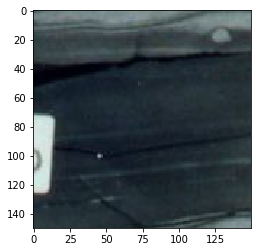

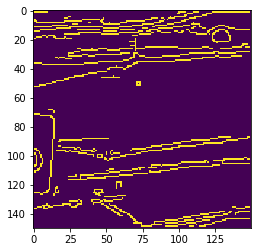

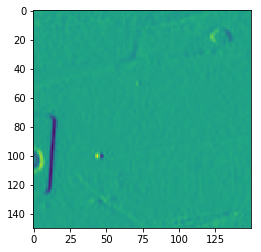

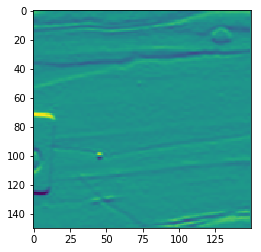

(150, 150)


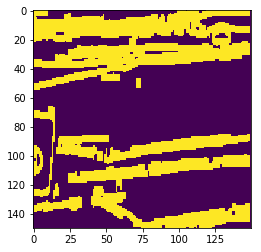

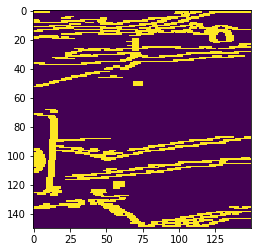

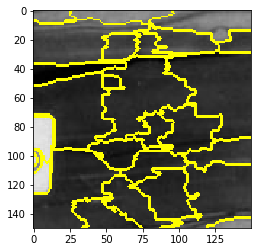

In [50]:
counter = 0
for image in objects[0]['img_Sample']:
    counter += 1
    if counter < 100:
        continue
    color_img = image
    counter += 1
    print('Sum Red')
    print(sum(sum(color_img[:, :, 0])))
    print('Sum Green')
    print(sum(sum(color_img[:, :, 1])))
    print('Sum Blue')
    print(sum(sum(color_img[:, :, 2])))
    image = color.rgb2gray(image)
    print('summed luminance')
    print(np.sum(np.sum(image)))
    edge_image = feature.canny(image, 0.2)
    v_edges = filters.sobel_v(image)
    print('Sobel V sum')
    print(sum(sum(v_edges)))
    print('Sobel H sum')
    h_edges = filters.sobel_h(image)
    print(sum(sum(h_edges)))
    print('max h edge count')
    print(np.max(np.sum(edge_image, axis=0)))
    print('max v edge count')
    print(np.max(np.sum(edge_image, axis=1)))
    print('Gabor kernal')
    gabor = filters.gabor(image, frequency=0.2)
    print(np.sum(np.sum(gabor, axis=1)))
    vert_dilation = np.array([[0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0],
                             [0, 0, 1, 0, 0]], dtype=np.uint8)
    horz_dilation = np.array([[0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0],
                             [1, 1, 1, 1, 1],
                             [0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0]], dtype=np.uint8)
    vert_img = morphology.dilation(edge_image, vert_dilation)
    horz_img = morphology.dilation(edge_image, horz_dilation)
    segmented_img = segmentation.quickshift(color_img)
    print('Dilated Vert Image')
    print(np.sum(np.sum(vert_img, axis=1)))
    print('Dilated Horz Image')
    print(np.sum(np.sum(horz_img, axis=1)))
    no_of_segments = len(np.unique(segmented_img))
    print('Segment Count')
    print(no_of_segments)
    plt.imshow(color_img)
    plt.show()
    plt.imshow(edge_image)
    plt.show()
    plt.imshow(v_edges)
    plt.show()
    plt.imshow(h_edges)
    plt.show()
    print(vert_img.shape)
    plt.imshow(vert_img)
    plt.show()
    plt.imshow(horz_img)
    plt.show()
    plt.imshow(segmentation.mark_boundaries(image, segmented_img))
    plt.show()
    # plt.imshow(gabor)
    # plt.show()
    if counter > 112:
        break

In [4]:
from core_photo_force.scripts_modules.well_core import process_image
import pandas as pd
output = []
for dataset in objects:
    table_list = []
    for idx, image in enumerate(dataset['img_Sample']):
        if idx % 10 == 0:
            print(idx/len(dataset['img_Sample']))
        temp_series = process_image(image)
        temp_series['bad_core'] = dataset['is_good'][idx]
        temp_series['is_sand'] = dataset['is_good'][idx]
        temp_series['grain_size'] = dataset['grain_size'][idx]
        if len(dataset['sed_structure_code']) > 0:
            temp_series['sed_structure_code'] = dataset['sed_structure_code'][idx]
        table_list.append(temp_series)
    table_list = pd.concat(table_list, axis=1)    
    print(table_list.T.shape)
    output.append(table_list.T)
output = pd.concat(output)
with open('feature_table_peter.pkl', 'wb') as f:
    pickle.dump(output, f)
feature_table = output

0.0


0.04784688995215311


0.09569377990430622


0.14354066985645933


0.19138755980861244


0.23923444976076555


0.28708133971291866


0.3349282296650718


0.3827751196172249


0.430622009569378


0.4784688995215311


0.5263157894736842


0.5741626794258373


0.6220095693779905


0.6698564593301436


0.7177033492822966


0.7655502392344498


0.8133971291866029


0.861244019138756


0.9090909090909091


0.9569377990430622


(209, 16)
0.0


0.05


0.1


0.15


0.2


0.25


0.3


0.35


0.4


0.45


0.5


0.55


0.6


0.65


0.7


0.75


0.8


0.85


0.9


0.95


(200, 16)
0.0


0.1


0.2


0.3


0.4


0.5


0.6


0.7


0.8


0.9


(100, 16)


In [7]:

objects = []
with open('feature_table.pkl', 'rb') as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
feature_table = objects[0]

feature_table.shape

(500, 16)

In [9]:
feature_table.head(5)

,Dilated Horz Image,Dilated Vert Image,Segment Count,Sobel H sum,Sobel V sum,Sum Blue,Sum Green,Sum Luminance,Sum Red,bad_core,gabor filter sum,grain_size,is_sand,max h edge count,max v edge count,sed_structure_code
0,6440,6935,28,4.8531,-17.9298,17665,17998,14473.5,18190,0,20.8953,None,0,103,35,None
1,8378,11213,30,42.9751,-25.2548,18826,19356,4428.04,17659,1,6.5328,0,1,46,60,1
2,7129,10244,30,-12.1109,3.50361,18750,19710,10182.2,19383,0,14.7061,None,0,41,56,None
3,8564,8943,22,-9.98167,-26.6821,19868,18731,13563.8,18314,0,19.7664,None,0,39,51,None
4,3954,6052,29,0.000510196,17.6159,18724,18900,3314.5,20728,1,4.56973,0,1,30,64,2


In [6]:
feature_cols = ['Dilated Horz Image', 'Dilated Vert Image', 'Segment Count',
       'Sobel H sum', 'Sobel V sum', 'Sum Blue', 'Sum Green', 'Sum Luminance',
       'Sum Red', 'max h edge count', 'max v edge count']
y_cols =  ['bad_core', 'grain_size', 'is_sand', 'sed_structure_code']

x_table = feature_table[feature_cols]
y_table = feature_table[y_cols]

ValueError: color kwarg must have one color per dataset

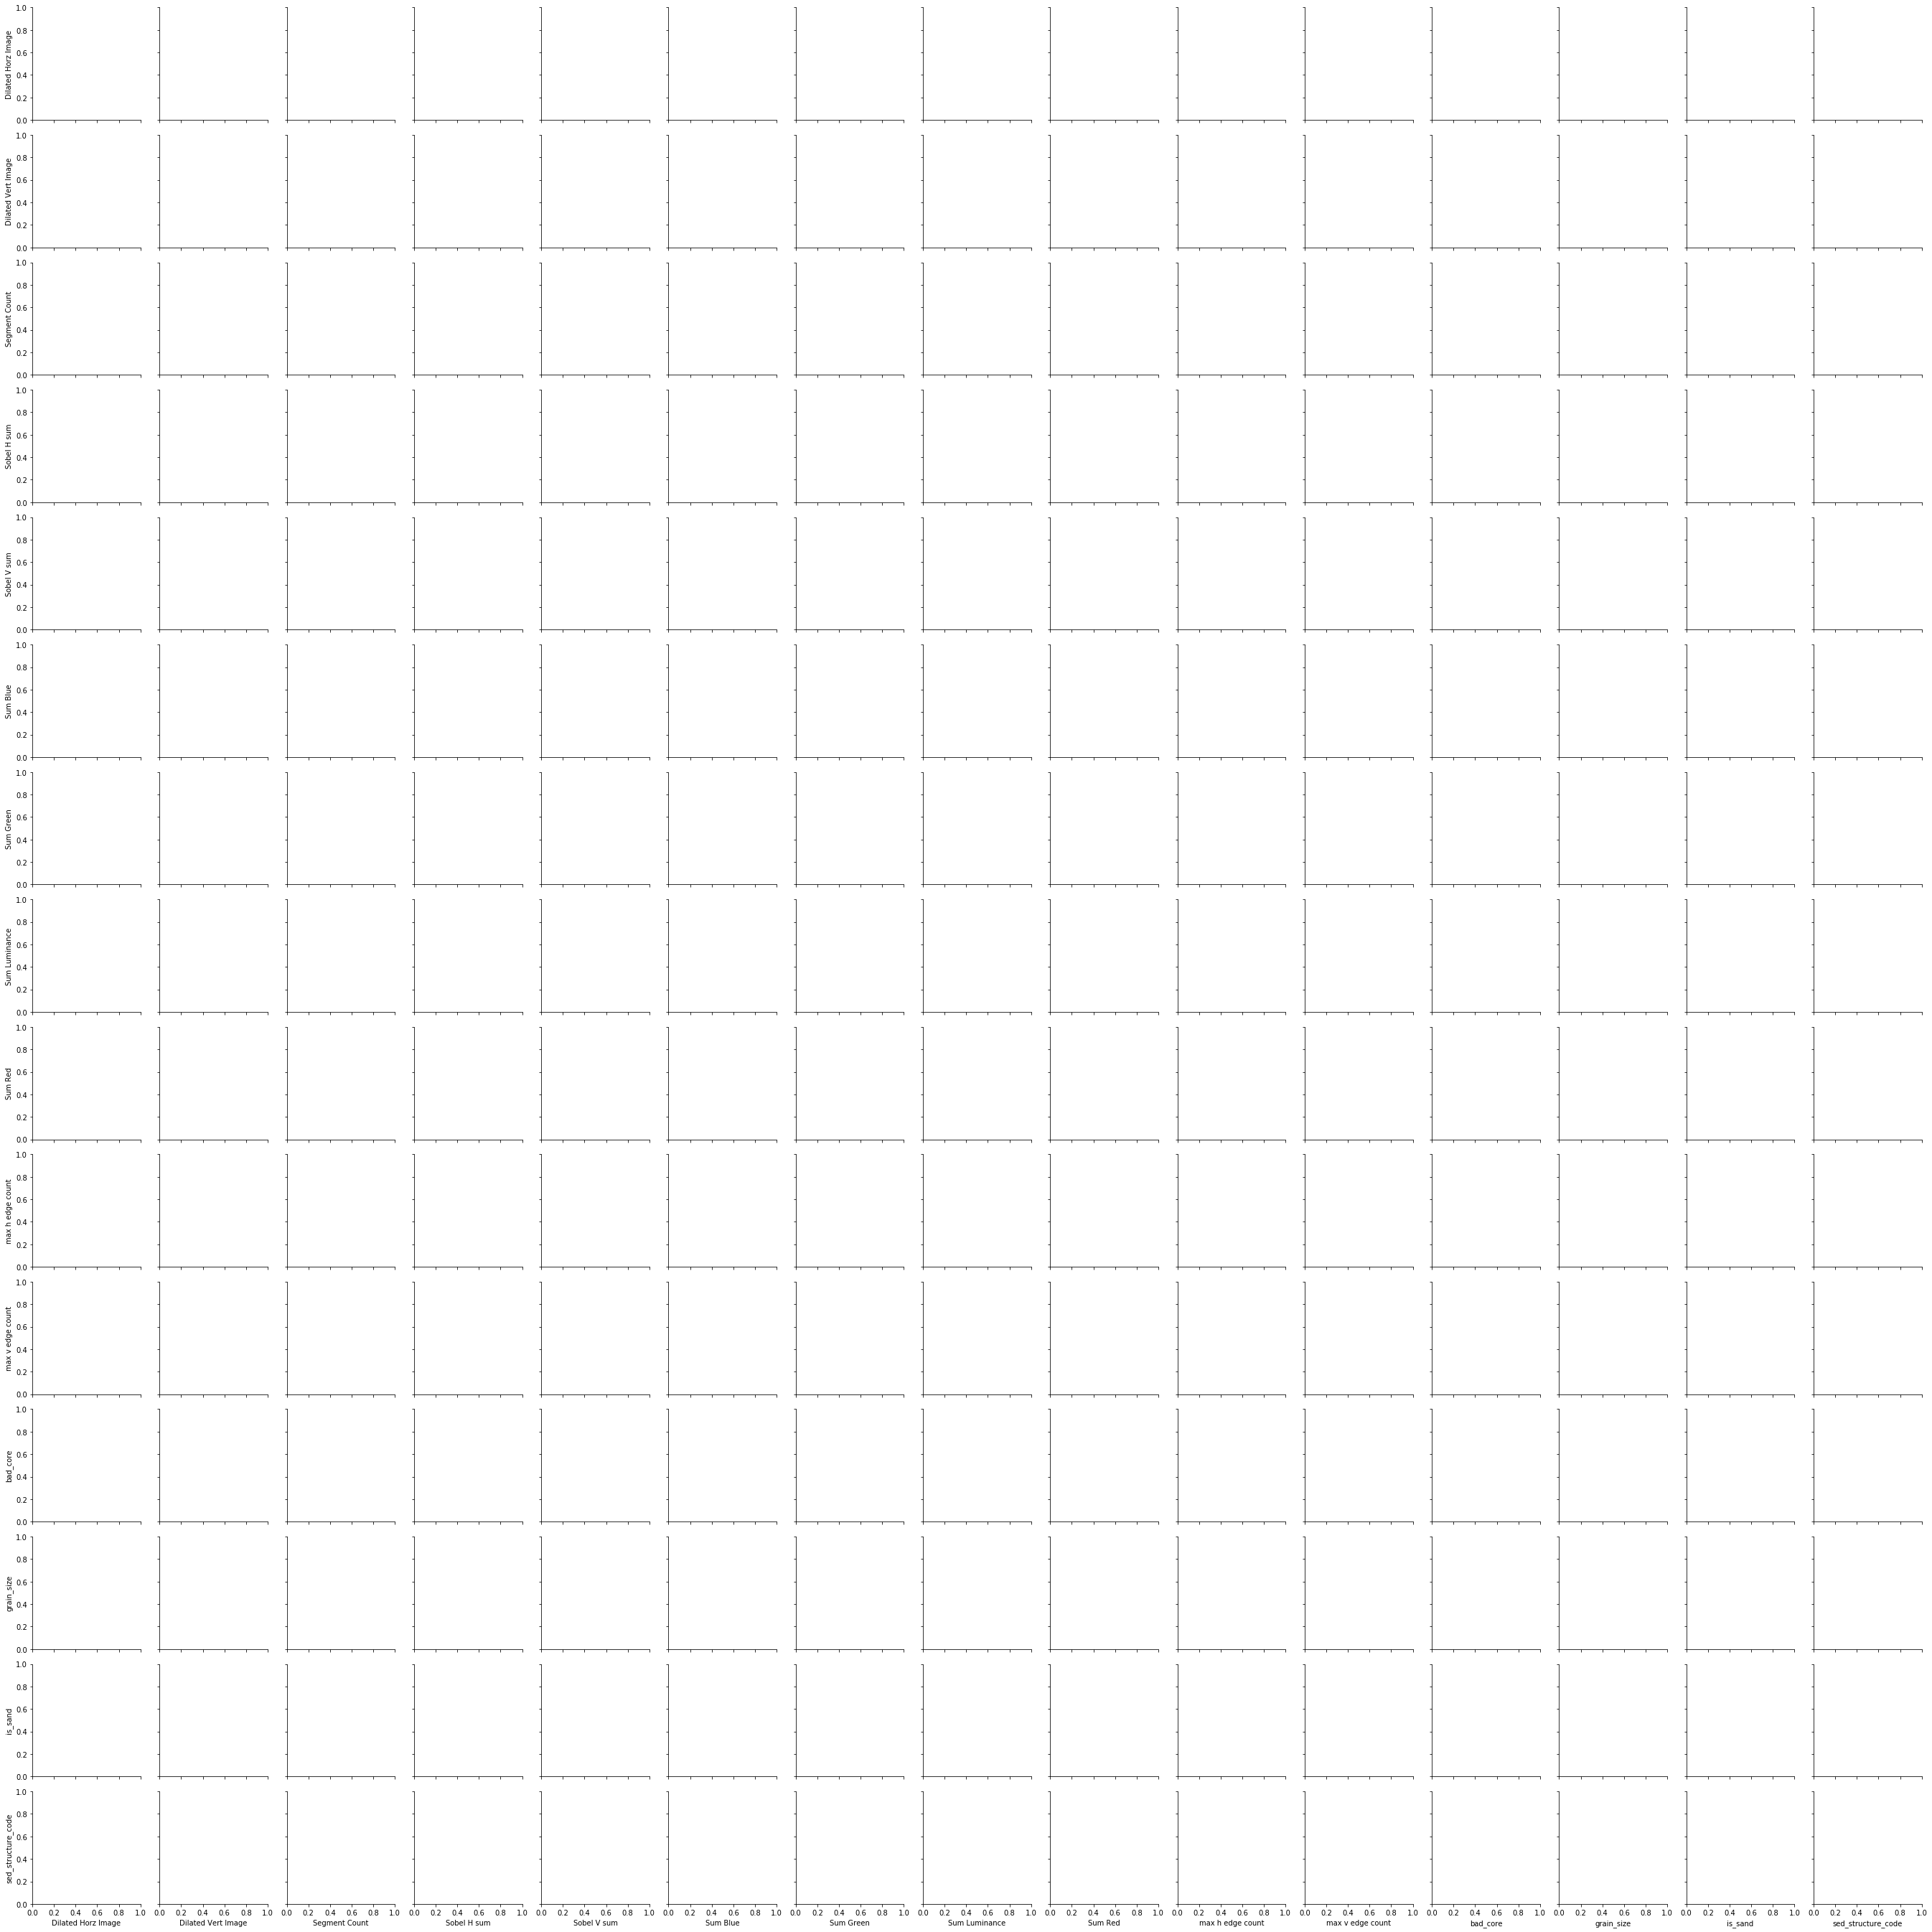

In [11]:
import seaborn as sns

sns.pairplot(feature_table[feature_cols + y_cols])

In [8]:
from sklearn import preprocessing, model_selection

X_train, X_test, y_train, y_test =  model_selection.train_test_split(x_table, y_table)

scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.iloc[:, 0])
y_pred_train = model.predict(X_train)
print(accuracy_score(y_pred_train, y_train.iloc[:, 0]))
y_pred_test = model.predict(X_test)
print(accuracy_score(y_pred_test, y_test.iloc[:, 0]))
print(y_pred_train)

1.0
0.9453125
['1' '1' '1' '1' '0' '0' '1' '0' '11' '0' '0' '1' '1' '0' '0' '1' '1' '0'
 '1' '1' '0' '0' '1' '0' '0' '1' '00' '0' '0' '1' '0' '1' '0' '1' '1' '0'
 '1' '0' '0' '0' '1' '00' '00' '0' '1' '1' '1' '1' 'o' '1' '1' '1' '1' '1'
 '0' '1' '1' '0' '1' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0'
 '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '1' '1' '0' '1'
 '1' '1' '' '0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '0' '1' '' '1' '11' '1'
 '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '0' '' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '' '1' '1' '1' '0' '0' '' ''
 '0' '11' '1' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '1'
 '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1' '0' '0'
 '1' '1' '1' '0' '0' '0' 

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

na_filter = ~y_train.iloc[:, 1].isna()
sand_y_train = y_train[na_filter]
X_train_sand = X_train[na_filter]
sand_y_train = sand_y_train.iloc[:, 1]
sand_y_train = pd.to_numeric(sand_y_train)
na_filter = ~sand_y_train.isna()
sand_y_train = sand_y_train[na_filter]
# str_filter = sand_y_train.str.isnumeric()
# print(test)
# print(sand_y_train)
# print(sand_y_train.dtype)
# print(X_train[na_filter].shape)

X_train_sand = X_train_sand[na_filter]
print(X_train_sand.shape)
model2 = RandomForestClassifier(n_estimators=100)
# model2 = SVC(kernel='poly')
model2.fit(X_train_sand, sand_y_train)
y_sand_pred_train = model2.predict(X_train_sand)
print(accuracy_score(y_sand_pred_train, sand_y_train))
na_filter = ~y_test.iloc[:,1].isna()
sand_y_test = y_test[na_filter]
sand_y_test = sand_y_test.iloc[:, 1]
sand_y_test = pd.to_numeric(sand_y_test)
sand_x_test = X_test[na_filter]
na_filter = ~sand_y_test.isna()
sand_y_test = sand_y_test[na_filter]
sand_x_test = sand_x_test[na_filter]
y_sand_pred_test = model2.predict(sand_x_test)
print(accuracy_score(y_sand_pred_test, sand_y_test))

(217, 11)


1.0
0.986301369863


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
sed_structures_train = y_train.iloc[:, 3]
sed_structures_train = pd.to_numeric(sed_structures_train)
na_filter = ~sed_structures_train.isna()
sed_structures_x_train = X_train[na_filter]
print(sed_structures_x_train.shape)
sed_structures_train = sed_structures_train[na_filter]
sed_structures_array = sed_structures_train.values
sed_structures_array = sed_structures_array.reshape(-1, 1)
encoder = OneHotEncoder()
encoder.fit(sed_structures_array)
sed_structures_train_encoded = encoder.transform(sed_structures_array)
print(sed_structures_train_encoded.shape)
sed_structures_test = y_test.iloc[:, 3]
na_filter = ~sed_structures_test.isna()
sed_structures_x_test = X_test[na_filter]
sed_structures_test = sed_structures_test[na_filter]
sed_structures_array_test = sed_structures_test.values
sed_structures_array_test = sed_structures_array_test.reshape(-1, 1)
sed_structures_test_encoded = encoder.transform(sed_structures_array_test)


model3 = MLPClassifier(hidden_layer_sizes=[100, 100])

model3.fit(sed_structures_x_train, sed_structures_train_encoded)
pred_y_sed_train = model3.predict(sed_structures_x_train)
print(f1_score(sed_structures_train_encoded, pred_y_sed_train, average='weighted'))
pred_y_sed_test = model3.predict(sed_structures_x_test)
print(f1_score(sed_structures_test_encoded, pred_y_sed_test, average='weighted'))

(220, 11)
(220, 4)


0.986125891543
0.920261519303


/Users/nathanieljones/untitled/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
from collections import defaultdict
models_output = defaultdict(list)
models_output['scaler'] = scaler
models_output['one_hot'] = encoder
models_output['good_photo_sample_model'] = model
models_output['sand_flagger'] = model2
models_output['sed_structures'] = model3
with open('trained_models.pkl', 'wb') as f:
    pickle.dump(models_output, f)
